# Neural Networks Course Exercise 1

Amirkabir University of Technology

Dr. Safabakhsh

By Gholamreza Dar

March 2022

## Imports and Inits

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style('dark')

from matplotlib.colors import ListedColormap

from tqdm.notebook import trange

## Useful functions

### Perceptron

In [48]:
class Perceptron():
    def __init__(self, lr=0.01, max_iter=50, tol=0.001, activation_function_name="linear"):
        self.lr = lr
        self.max_iter = max_iter
        self.activation_function_name = activation_function_name
        self.tol = tol
        self.X = None
        self.y = None
        self.X_valid = None
        self.y_valid = None

    def fit(self, X, y, X_valid, y_valid, debug=False):
        self.X = X
        self.y = y
        self.X_valid = X_valid
        self.y_valid = y_valid

        self.W = np.zeros(1 + X.shape[1])
        self.error_history = []
        self.error_history_valid = []

        for iter in trange(self.max_iter):
            errors = 0
            # For every sample
            for Xi, target in zip(X, y):
                # Perceptron update rule
                update = self.lr * (target - self.predict(Xi))
                # Update weights
                self.W[1:] += update * Xi
                # Update bias
                self.W[0] += update * 1.0
                # Count errors
                if abs(update)!=0.0:
                    errors += 1

            if debug:
                print("iter:", iter)
                self.plot_decision_boundary()
                plt.show()

            # Save error history
            self.error_history.append(self.total_error())
            self.error_history_valid.append(self.total_error_valid())

            if errors == 0:
                print("Converged Sooner than max_iter")
                break
            
        return self.error_history

    def activation_function(self, X):
        if self.activation_function_name == "linear":
            return X
        elif self.activation_function_name == "relu":
            return np.maximum(X, 0)
        elif self.activation_function_name == "sigmoid":
            return 1.0 / (1.0 + np.exp(-X))
        elif self.activation_function_name == "tanh":
            return np.tanh(X)
        else:
            raise Exception("Activation function not found")

    def feedforward(self, X):
        # Output of the network given X as input and W as learned weights
        return np.dot(X, self.W[1:]) + self.W[0]

    def predict(self, X):
        if self.activation_function_name == "linear":
            return np.where(self.activation_function(self.feedforward(X)) >= 0.0, 1, -1)
        elif self.activation_function_name == "relu":
            return np.where(self.activation_function(self.feedforward(X)) >= 0.5, 1, -1)
        elif self.activation_function_name == "sigmoid":
            return np.where(self.activation_function(self.feedforward(X)) >= 0.5, 1, -1)
        elif self.activation_function_name == "tanh":
            return np.where(self.activation_function(self.feedforward(X)) >= 0.0, 1, -1)
        else:
            raise Exception("Activation function not found")

    def plot_learning_curve(self):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_title(f"Perceptron Learning Curve: lr={self.lr}, activation_function={self.activation_function_name}")
        ax.plot(np.arange(1, len(self.error_history)+1), self.error_history, 'r-', label='Training')
        ax.plot(np.arange(1, len(self.error_history_valid)+1), self.error_history_valid, 'g-', label='Validation')
        ax.legend()
        ax.set_ylabel("Error Rate")
        ax.set_xlabel("Iteration")
        plt.show()
        
    def plot_decision_boundary(self):
        plot_decision_regions(self.X, self.y, classifier=self, title=f"Perceptron Decision Boundary: lr={self.lr}, activation_function={self.activation_function_name}")
        plt.show()
    
    def total_error(self):
        return np.mean(self.predict(self.X) != self.y)
    
    def total_error_valid(self):
        return np.mean(self.predict(self.X_valid) != self.y_valid)
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)


### Adaline

In [49]:
class Adaline():
    def __init__(self, lr=0.01, max_iter=50, activation_function_name="linear"):
        self.lr = lr
        self.max_iter = max_iter
        self.activation_function_name = activation_function_name
        self.X = None
        self.y = None
        self.X_valid = None
        self.y_valid = None
        self.error_history = []
        self.error_history_valid = []

    def fit(self, X, y, X_valid, y_valid):

        self.W = np.zeros(1 + X.shape[1])
        self.mse_history = []
        self.X = X
        self.y = y
        self.X_valid = X_valid
        self.y_valid = y_valid

        for iter in trange(self.max_iter):
            # Calculate output
            output = self.activation_function(self.feedforward(X))
            # difference between output and target
            error = (y - output)
            # Update weights
            self.W[1:] += self.lr * X.T.dot(error)
            # Update bias (X0 = 1.0)
            self.W[0] += self.lr * 1.0 * error.sum()
            # Calculate current mean squared error
            mse = (np.power(error, 2)).sum() / 2.0

            # Save mse history
            self.mse_history.append(mse)
            # Save error history
            self.error_history.append(self.total_error())
            self.error_history_valid.append(self.total_error_valid())
        return self.mse_history
    
    def activation_function(self, X):
        if self.activation_function_name == "linear":
            return X
        elif self.activation_function_name == "relu":
            return np.maximum(X, 0)
        elif self.activation_function_name == "sigmoid":
            return 1.0 / (1.0 + np.exp(-X))
        elif self.activation_function_name == "tanh":
            return np.tanh(X)
        else:
            raise Exception("Activation function not found")
    
    def feedforward(self, X):
        # Output of the network given X as input and W as learned weights
        return np.dot(X, self.W[1:]) + self.W[0]

    def predict(self, X):
        # 1 if output is > 0, -1 otherwise
        if self.activation_function_name == "linear":
            return np.where(self.activation_function(self.feedforward(X)) >= 0.0, 1, -1)
        elif self.activation_function_name == "relu":
            return np.where(self.activation_function(self.feedforward(X)) >= 0.5, 1, -1)
        elif self.activation_function_name == "sigmoid":
            return np.where(self.activation_function(self.feedforward(X)) >= 0.5, 1, -1)
        elif self.activation_function_name == "tanh":
            return np.where(self.activation_function(self.feedforward(X)) >= 0.0, 1, -1)
        else:
            raise Exception("Activation function not found")
            
    def plot_learning_curve(self):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_title(f"Adaline Learning Curve: lr={self.lr}, activation_function={self.activation_function_name}")
        ax.plot(np.arange(1, len(self.error_history)+1), self.error_history, 'r-', label='Training')
        ax.plot(np.arange(1, len(self.error_history_valid)+1), self.error_history_valid, 'g-', label='Validation')
        ax.legend()
        ax.set_ylabel("Error Rate")
        ax.set_xlabel("Iteration")
        plt.show()
    
    def plot_mse(self):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_title(f"Adaline MSE Curve: lr={self.lr}, activation_function={self.activation_function_name}")
        ax.plot(np.arange(1, len(self.mse_history)+1), self.mse_history, 'b-')
        ax.set_ylabel("Mean Squared Error")
        ax.set_xlabel("Iteration")
        plt.show()
        
    def plot_decision_boundary(self):
        plot_decision_regions(self.X, self.y, classifier=self, title=f"Adaline Decision Boundary: lr={self.lr}, activation_function={self.activation_function_name}")
    
    def total_error(self):
        return np.mean(self.predict(self.X) != self.y)
    
    def total_error_valid(self):
        return np.mean(self.predict(self.X_valid) != self.y_valid)
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)

In [50]:
def plot_decision_regions(X, y, classifier, resolution=0.02, title=''):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title(title)

    colors = ('springgreen', 'royalblue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker='o', label=cl, edgecolor='black', linewidth=0.2)


In [51]:
# a = np.arange(0,10,1)
# b = np.arange(0,5, 1)
# xx, yy = np.meshgrid(a, b)
# np.array([xx.ravel(), yy.ravel()]).T


## Create Datasets

In [52]:
# Number of data
M = 10000

### Linearly seperable

In [53]:
rng = np.random.RandomState(2)

X = np.zeros((M, 2), dtype=np.float64)
y = np.zeros(M, dtype=int)

# Generate gaussian data class 1
mue_1 = [0, 0]
cov_1 = np.array([
    [1, 0],
    [0, 1]
    ])
X[:M//2] = rng.multivariate_normal(mue_1, cov_1, M//2)
y[:M//2] = -1

# Generate gaussian data class 2
mue_2 = [6, 6]
cov_2 = np.array([
    [1, 0],
    [0, 1]
    ])
X[M//2:] = rng.multivariate_normal(mue_2, cov_2, M//2)
y[M//2:] = 1

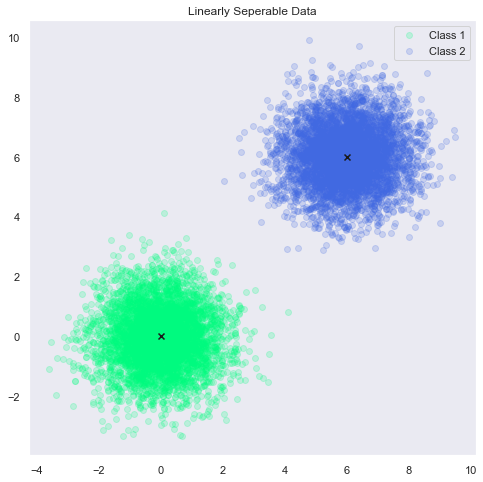

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_title("Linearly Seperable Data")
# Plot points
ax.scatter(X[y == -1, 0], X[y == -1, 1], c='springgreen', marker='o', label='Class 1', alpha=0.2)
ax.scatter(X[y == 1, 0], X[y == 1, 1], c='royalblue', marker='o', label='Class 2', alpha=0.2)

# Draw center points
ax.scatter(mue_1[0], mue_1[1], c='k', marker='x', label='Mue 1')
ax.scatter(mue_2[0], mue_2[1], c='k', marker='x', label='Mue 2')

h,l = ax.get_legend_handles_labels()
ax.legend(h[:2], l[:2]) # Limit the legend to the two scatters

plt.show()

### Non-linearly seperable

In [55]:
rng = np.random.RandomState(3)

X_non = np.zeros((M, 2), dtype=np.float64)
y_non = np.zeros(M, dtype=int)

# Generate gaussian data class 1
mue_3 = [0, 0]
cov_3 = np.array([
    [1, 0],
    [0, 1]
    ])
X_non[:M//4] = rng.multivariate_normal(mue_3, cov_3, M//4)
y_non[:M//4] = 1

mue_4 = [8, 8]
cov_4 = np.array([
    [1, 0],
    [0, 1]
    ])
X_non[M//4:M//2] = rng.multivariate_normal(mue_4, cov_4, M//4)
y_non[M//4:M//2] = 1

# Generate gaussian data class 2
mue_5 = [0, 8]
cov_5 = np.array([
    [1, 0],
    [0, 1]
    ])
X_non[M//2:3*M//4] = rng.multivariate_normal(mue_5, cov_5, M//4)
y_non[M//2:3*M//4] = -1

mue_6 = [8, 0]
cov_6 = np.array([
    [1, 0],
    [0, 1]
    ])
X_non[3*M//4:] = rng.multivariate_normal(mue_6, cov_6, M//4)
y_non[3*M//4:] = -1

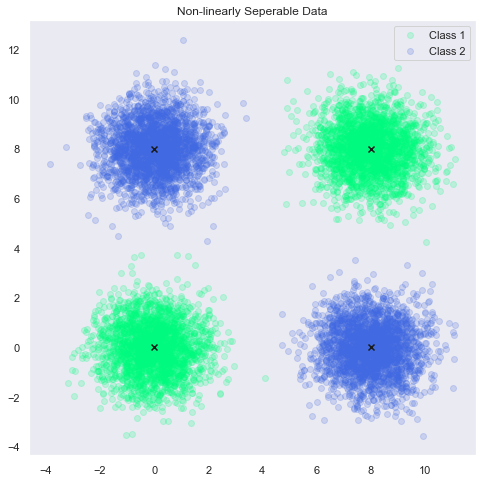

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_title("Non-linearly Seperable Data")

# Plot points
ax.scatter(X_non[y == -1, 0], X_non[y == -1, 1], c='springgreen', marker='o', label='Class 1', alpha=0.2)
ax.scatter(X_non[y == 1, 0], X_non[y == 1, 1], c='royalblue', marker='o', label='Class 2', alpha=0.2)

# Draw center points
ax.scatter(mue_3[0], mue_3[1], c='k', marker='x', label='Mue 3')
ax.scatter(mue_4[0], mue_4[1], c='k', marker='x', label='Mue 4')
ax.scatter(mue_5[0], mue_5[1], c='k', marker='x', label='Mue 5')
ax.scatter(mue_6[0], mue_6[1], c='k', marker='x', label='Mue 6')

h,l = ax.get_legend_handles_labels()
ax.legend(h[:2], l[:2]) # Limit the legend to the two scatters

plt.show()

### Train Test Validation Split

In [57]:
from sklearn.model_selection import train_test_split
seed = 43

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.125, random_state=seed)

X_train_non, X_test_non, y_train_non, y_test_non = train_test_split(X_non, y_non, test_size=0.2, random_state=seed)
X_train_non, X_valid_non, y_train_non, y_valid_non = train_test_split(X_train_non, y_train_non, test_size=0.125, random_state=seed)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_valid shape: {X_valid.shape}")

X_train shape: (7000, 2)
X_test shape: (2000, 2)
X_valid shape: (1000, 2)


In [58]:
X_train[0]

array([-1.58487089, -1.03562788])

## Main

### Linearly Seperable Case

#### Perceptron

  0%|          | 0/20 [00:00<?, ?it/s]

Converged Sooner than max_iter
Score on test set: 1.000


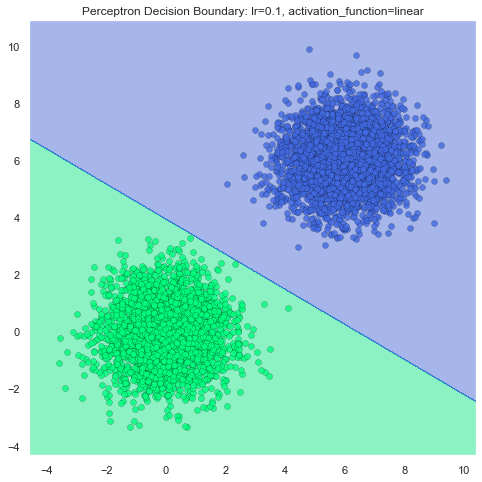

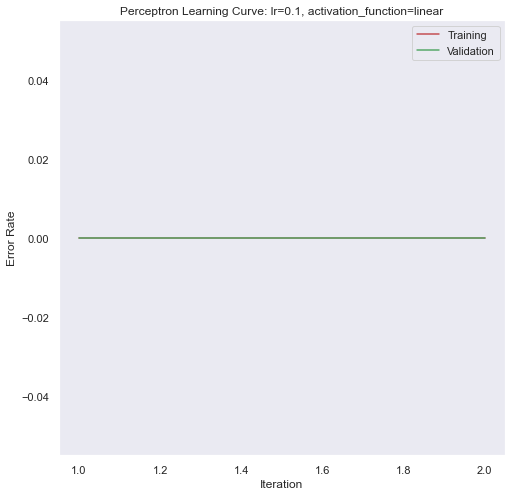

In [59]:
perceptron = Perceptron(lr=0.1, max_iter=20, activation_function_name="linear")
perceptron.fit(X_train, y_train, X_valid, y_valid)
score = perceptron.score(X_test, y_test)
print(f"Score on test set: {score:.3f}")
perceptron.plot_decision_boundary()
perceptron.plot_learning_curve()

In [60]:
print(f"W: {perceptron.W}")

W: [-2.8         0.43645978  0.71034753]


In [61]:
y_train[:100]

array([-1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
        1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1])

#### Adaline

  0%|          | 0/140 [00:00<?, ?it/s]

Score on test set: 1.000


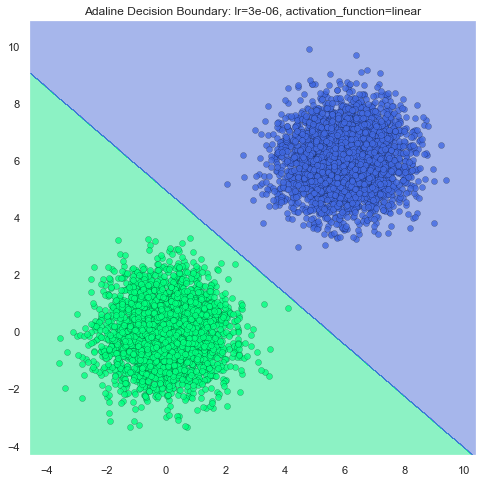

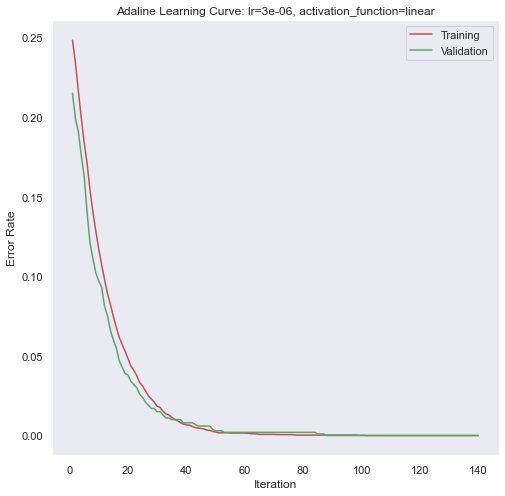

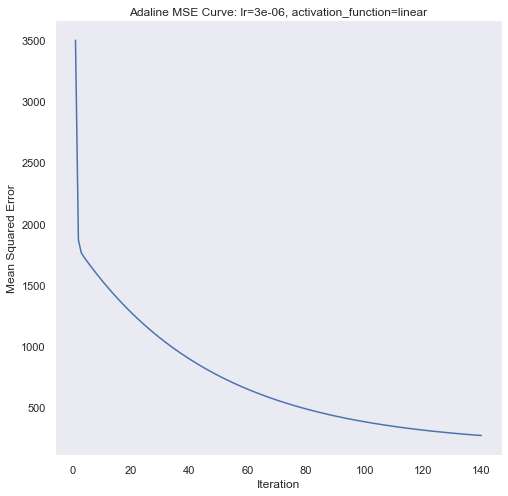

In [62]:
adaline = Adaline(lr=3e-6, max_iter=140)
adaline.fit(X_train, y_train, X_valid, y_valid)
score = adaline.score(X_test, y_test)
print(f"Score on test set: {score:.3f}")
adaline.plot_decision_boundary()
adaline.plot_learning_curve()
adaline.plot_mse()

### Non-Linearly Seperable Case

#### Perceptron

  0%|          | 0/40 [00:00<?, ?it/s]

Score on test set: 0.741


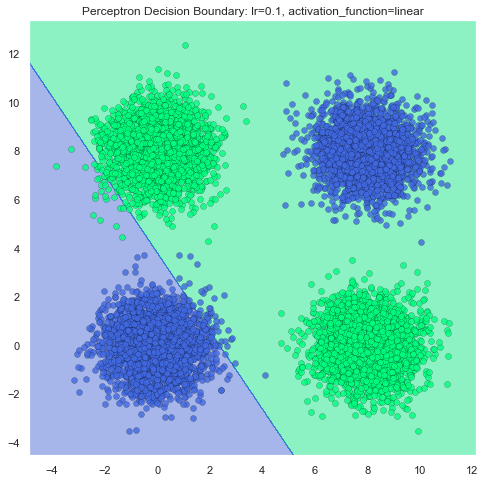

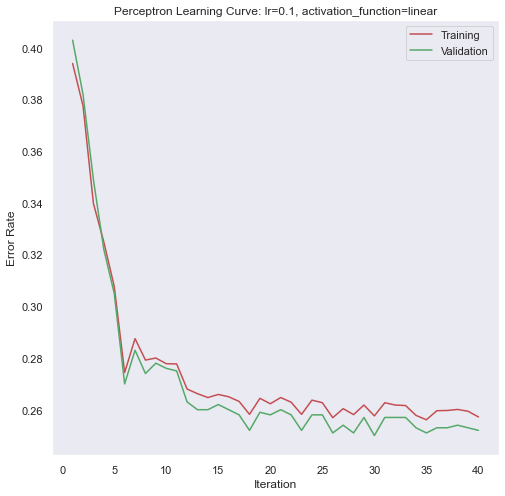

In [63]:
perceptron_non = Perceptron(lr=0.1, max_iter=40)
perceptron_non.fit(X_non, y_non, X_valid_non, y_valid_non)
score = perceptron_non.score(X_test_non, y_test_non)
print(f"Score on test set: {score:.3f}")
perceptron_non.plot_decision_boundary()
perceptron_non.plot_learning_curve()

#### Adaline

  0%|          | 0/400 [00:00<?, ?it/s]

Score on test set: 0.565


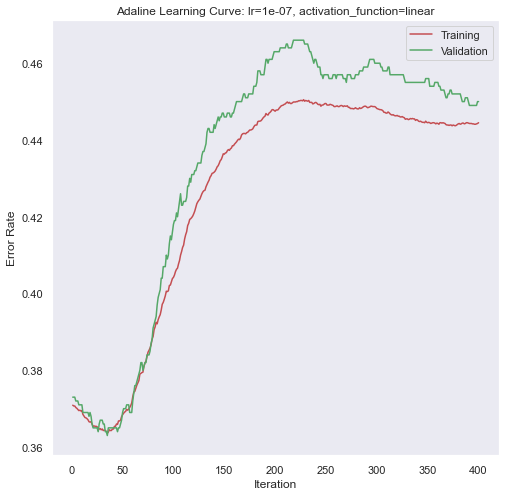

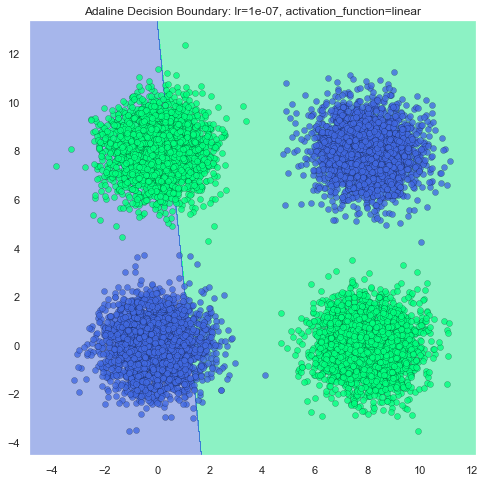

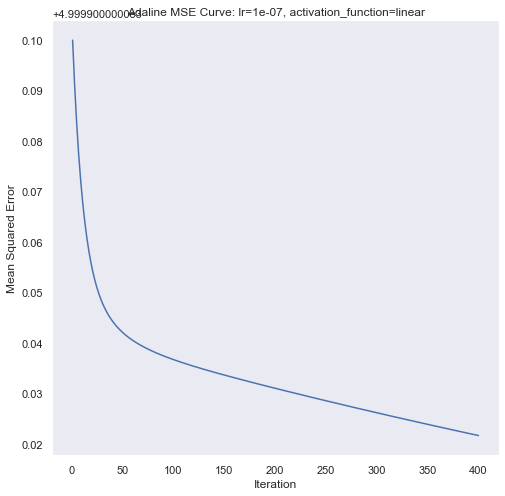

In [64]:
adaline_non = Adaline(lr=1e-7, max_iter=400, activation_function_name="linear")
adaline_non.fit(X_non, y_non, X_valid_non, y_valid_non)
score = adaline_non.score(X_test_non, y_test_non)
print(f"Score on test set: {score:.3f}")
adaline_non.plot_learning_curve()
adaline_non.plot_decision_boundary()
adaline_non.plot_mse()

In [65]:
W_init=np.array([-300, 33.9, 27.4, 21.8, 19.8, -30], dtype=np.float64)


#### Quadratic Perceptron

In [66]:
np.random.randint(-300, 300, size=6).astype(np.float64)

array([  74.,   71., -135.,  199.,  176., -150.])

#### Quadratic Adaline

## Activation Functions Test

  0%|          | 0/20 [00:00<?, ?it/s]

Converged Sooner than max_iter
Score on test set: 1.000


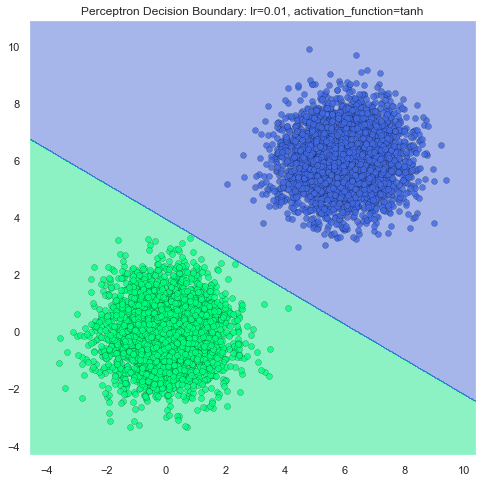

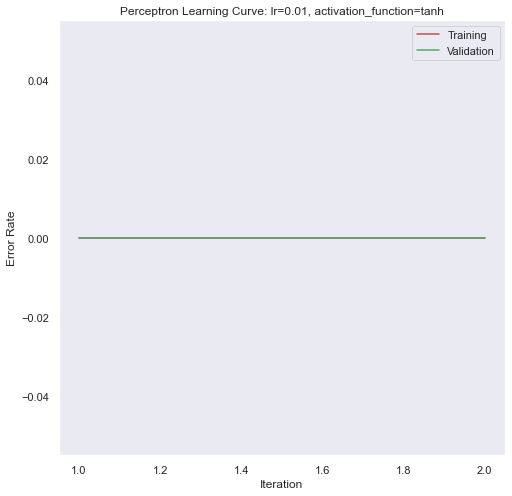

In [67]:
perceptron = Perceptron(lr=0.01, max_iter=20, activation_function_name="tanh")
perceptron.fit(X_train, y_train, X_valid, y_valid)
score = perceptron.score(X_test, y_test)
print(f"Score on test set: {score:.3f}")
perceptron.plot_decision_boundary()
perceptron.plot_learning_curve()

  0%|          | 0/250 [00:00<?, ?it/s]

Score on test set: 1.000


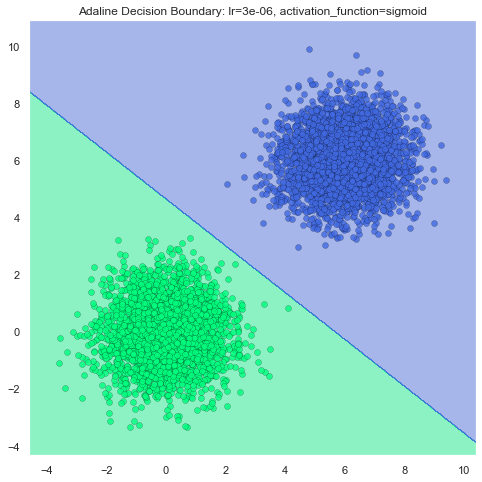

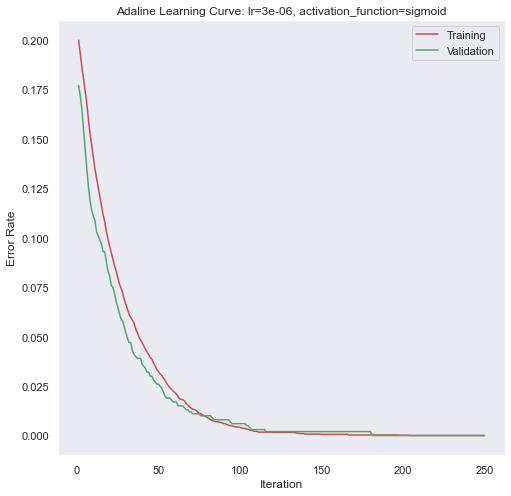

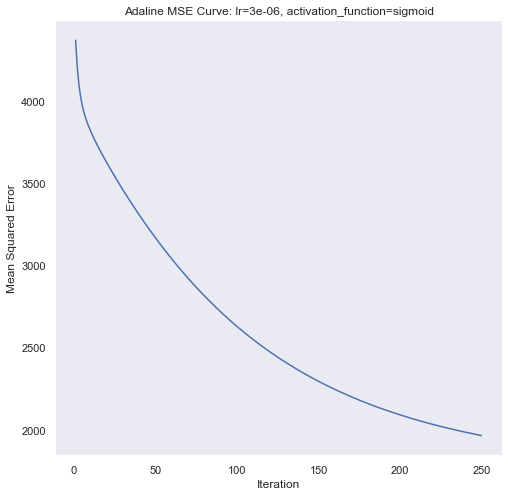

In [68]:
adaline = Adaline(lr=0.000003, max_iter=250, activation_function_name="sigmoid")
adaline.fit(X_train, y_train, X_valid, y_valid)
score = adaline.score(X_test, y_test)
print(f"Score on test set: {score:.3f}")
adaline.plot_decision_boundary()
adaline.plot_learning_curve()
adaline.plot_mse()

  0%|          | 0/30 [00:00<?, ?it/s]

Score on test set: 0.742


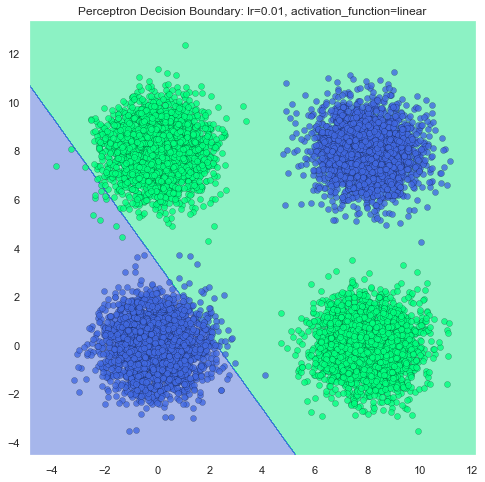

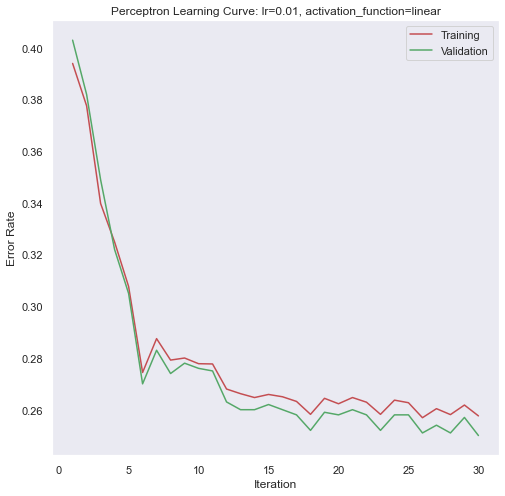

In [69]:
perceptron_non = Perceptron(lr=0.01, max_iter=30, activation_function_name="linear")
perceptron_non.fit(X_non, y_non, X_valid_non, y_valid_non)
score = perceptron_non.score(X_test_non, y_test_non)
print(f"Score on test set: {score:.3f}")
perceptron_non.plot_decision_boundary()
perceptron_non.plot_learning_curve()

  0%|          | 0/10 [00:00<?, ?it/s]

Score on test set: 0.631


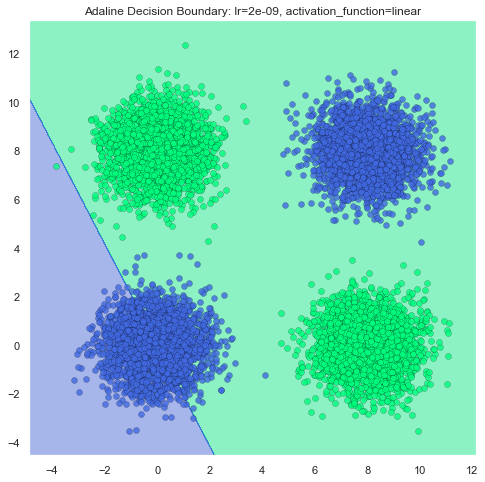

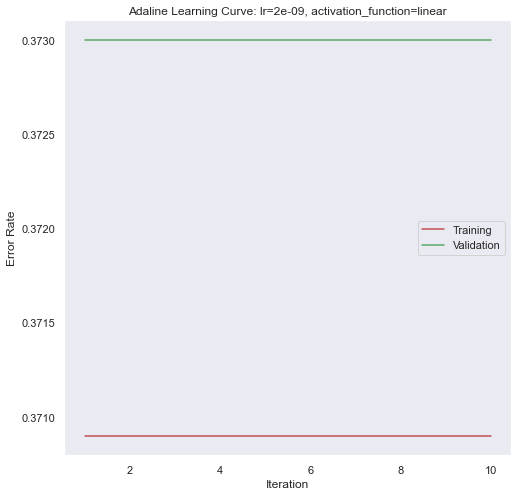

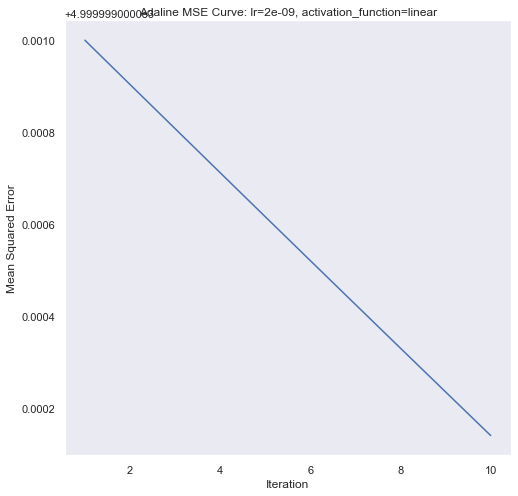

In [70]:
adaline_non = Adaline(lr=0.000000002, max_iter=10, activation_function_name="linear")
adaline_non.fit(X_non, y_non, X_valid_non, y_valid_non)
score = adaline_non.score(X_test_non, y_test_non)
print(f"Score on test set: {score:.3f}")
adaline_non.plot_decision_boundary()
adaline_non.plot_learning_curve()
adaline_non.plot_mse()

## Debug

In [71]:
# from mlxtend.classifier import Perceptron as PP

# ppn = PP(epochs=50, eta=0.05, random_seed=0)
# ppn.fit(X, y)

# plot_decision_regions(X, y, classifier=ppn)


In [72]:
# ppn.b_.round(6)